1. Regression Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Dataset overview
heart_disease = pd.read_csv("C:/GitHub/BINF-5507-Assignments/Assignment-2/Data/heart_disease_uci_dataset.csv")
heart_disease.head()
heart_disease.describe()
heart_disease.info()
print(heart_disease.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB
(920, 15)


EDA

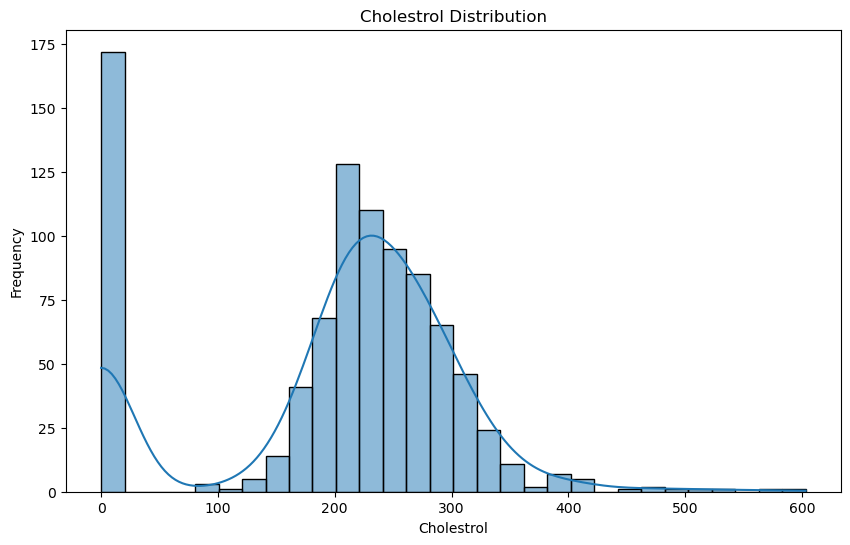

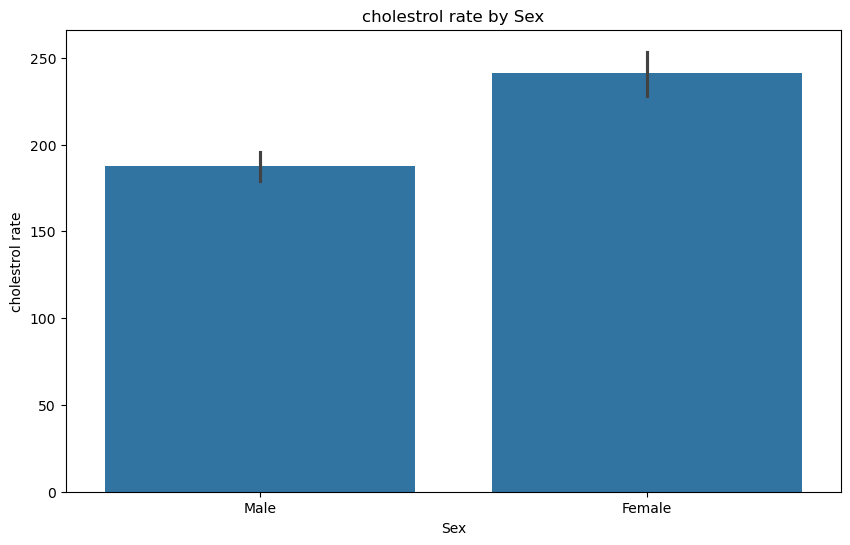

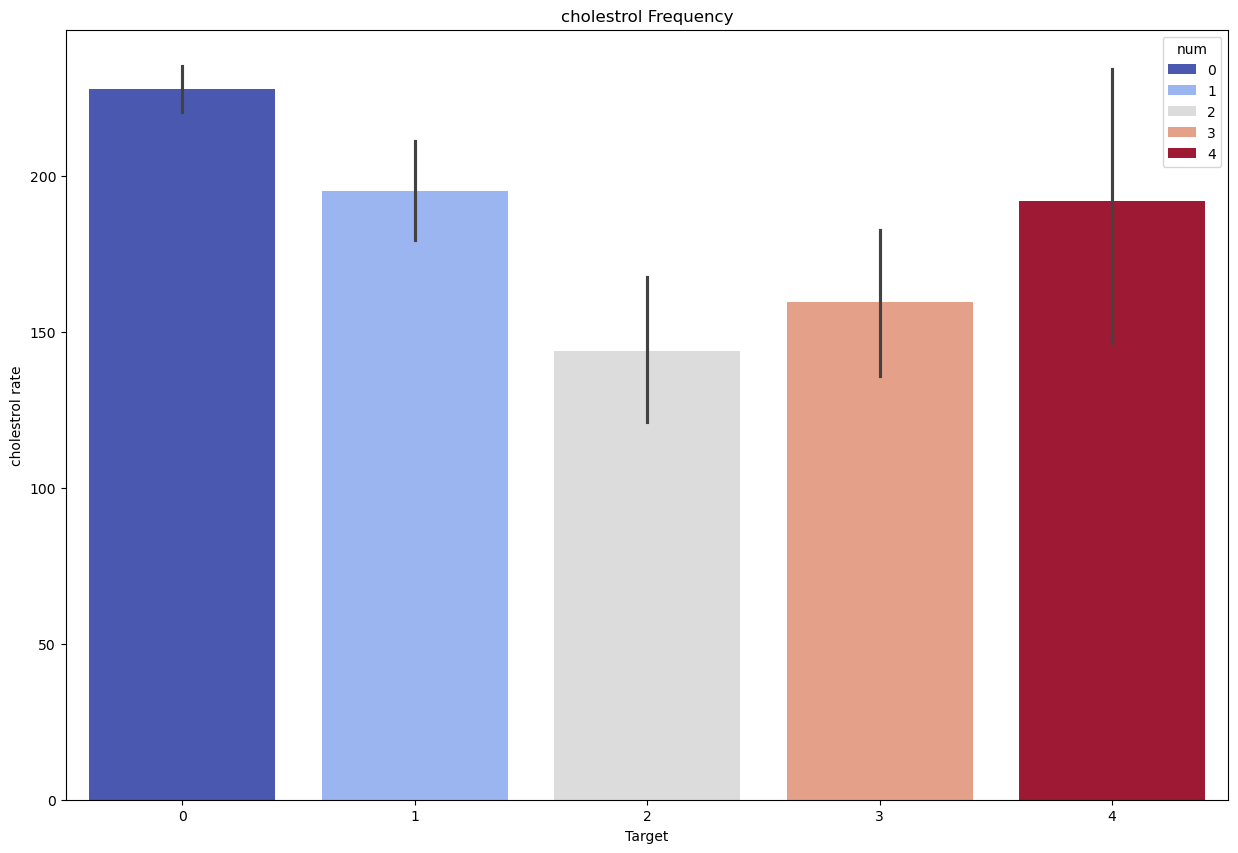

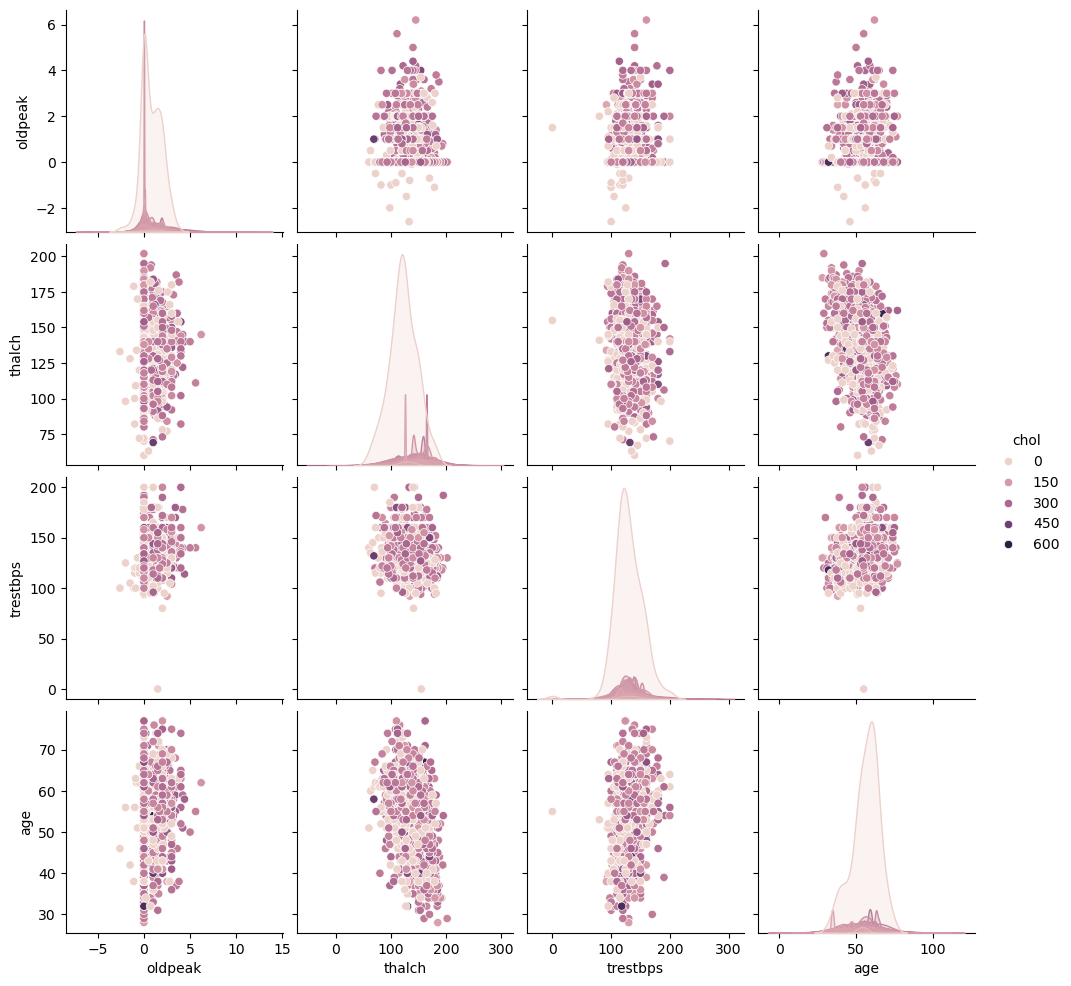

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Histogram of cholestrol
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_disease['chol'], bins=30, kde=True)
plt.title('Cholestrol Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()

# Plot of cholestrol column grouped by num column 
fig = px.histogram(data_frame=heart_disease, x='chol', color='num')
fig.show()


# Bar plot of cholestrol distribution by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='chol', data=heart_disease)
plt.title('cholestrol rate by Sex')
plt.xlabel('Sex')
plt.ylabel('cholestrol rate')
plt.show()

# Bar plot of cholestrol frequency
plt.figure(figsize=(15, 10))
sns.barplot(x='num', y='chol', data=heart_disease, hue='num', palette='coolwarm')
plt.title('cholestrol Frequency')
plt.xlabel('Target')
plt.ylabel('cholestrol rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(heart_disease[['oldpeak', 'thalch', 'chol', 'trestbps', 'age']], hue='chol')
plt.show()


Data Cleaning

In [ ]:
clean_data = heart_disease.copy

# According to dataset description in 'num' column, Value 0 means 50% diameter narrowing and Value =>1 means 50% diameter narrowing
# convert num column to 1 and 0
clean_data.loc[clean_data['num' > 0, 'num']] = 1

# Remove duplicates
clean_data = clean_data.copy().drop_duplicates()

# Check for missing values
na_count = clean_data.isna().sum()

# Impute missing values 
# for numerical data
num_cols = clean_data.select_dtypes(include='number').columns.tolist()
clean_data = clean_data.fillna(num_cols.mean(), inplace=True)
# for categorical data
cat_cols = clean_data.select_dtypes(include=['object']).columns.tolist()
clean_data = clean_data.fillna(cat_cols.mode(), inplace=True)

# Check for Outliers
Q1 = clean_data[num_cols].quantile(0.25)
Q3 = clean_data[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((clean_data[num_cols] < (Q1 - 1.5 * IQR)) | (clean_data[num_cols] > (Q3 + 1.5 * IQR))).sum()

# PLot the boxplot to check the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=# Check for missing values
na_count = clean_data.isna().sum()

# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=clean_data, y='outliers_count_specified')
fig.show()

# Convert categorical columns
clean_data = pd.get_dummies(clean_data, columns=cat_cols, drop_first=True)
clean_data.head()

# check for correlation to avoid overfitting
corr = clean_data.corr()
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()


Linear Regression Model

In [ ]:
from sklearn.linear_model import ElasticNet

def simple_model(input_data, split_data=True, scale_data=False, print_report=False):   
 # split the data into features and target
    target = input_data.copy()[input_data.columns[0]]
    features = input_data.copy()[input_data.columns[1:]]

    # if the column is not numeric, encode it (one-hot)
    for col in features.columns:
        if features[col].dtype == 'object':
            features = pd.concat([features, pd.get_dummies(features[col], prefix=col)], axis=1)
            features.drop(col, axis=1, inplace=True)

    if split_data:
        # perform a stratified split on the data
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

    if scale_data:
        # scale the data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    # instantiate and fit the model
    log_reg = LogisticRegression(random_state=42, max_iter=100, solver='liblinear', penalty='l2', C=1.0)
    log_reg.fit(X_train, y_train)

    # make predictions and evaluate the model
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    coefficient = log_reg.coef_

    print(f'Accuracy: {accuracy}')


np.random.seed(42)
X = clean_data.drop("chol",axis=1)
y = clean_data["chol"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scalar=StandardScaler()
df[numeric_cols]=scalar.fit_transform(df[numeric_cols])

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
Coefficient = lin_reg.coef_
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual', data='heart_disease')
plt.plot(X_test, y_pred, color='red', label='Predicted', data='heart_disease')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Implementing ElasticNet
elasticnet_reg = ElasticNet(alpha=0.1,l1_ratio=0.0)
elasticnet_reg.fit(X_train, y_train)
y_pred_elastic = elasticnet_reg.predict(X_test)

# Evaluate the models
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Linear Regression - Root Mean Squared Error: {rmse}, R^2 Score: {r2}")
print(f"ElasticNet Regression - Root Mean Squared Error: {rmse_elastic}, R^2 Score: {r2_elastic}")

alpha_value = [0.1, 0.5, 1.0]
l1_ratio_value =[0.0, 0.3, 1.0 ]

for i in range():
   elasticnet_reg = ElasticNet(alpha=alpha_value,l1_ratio=l1_ratio_value)
   elasticnet_reg.fit(X_train, y_train)
   y_pred_elastic = elasticnet_reg.predict(X_test)
   rmse_elastic = mean_squared_error(y_test, y_pred_elastic)
   r2_elastic = r2_score(y_test, y_pred_elastic)

results = pd.DataFrame(columns=['alpha', 'l1_ratio', 'RMSE', 'R2'])
   
print(f"Linear Regression - Accuracy: )
print(f"ElasticNet Regression -     
print(f"Linear Regression - Accuracy: , Coefficient: Root Mean Squared Error: {rmse}, R^2 Score: {r2}")
print(f"ElasticNet Regression - Root Mean Squared Error: {rmse_elastic}, R^2 Score: {r2_elastic}")

# Heatmap plot
heatmap_data = results.pivot(index='alpha', columns='l1_ratio', values='R2')

plt.figure(figsize=(8,8))
sns.heatmap(heatmap_data, annot=True, cmap="magma", cbar=True)
plt.title("Heatmap of R2 and RMSE across a range of alpha and l1_ratio")
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.show()

# 4. Identify the top-performing confi guration based on the evaluation metrics.

Implement ElasticNet. Experiment with varying regularization parameters (alpha and l1_ratio) and observe their eff ects on model coeffi cients and performance.

Create a heatmap of R2 and RMSE across a range of alpha and l1_ratio. Use clear labels and a color bar to guide interpretation.

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(clean_data[['R2', 'RMSE']])
plt.title('Relation between Max Heart rate and target', fontsize = 20)

Identify the top-performing confi guration based on the evaluation metrics.

Classification Models

1. Use accuracy, F1 score, AUROC, and AUPRC as evaluation metrics.
2. For logistic regression:
■ Use LogisticRegression. Experiment with varying parameters (penalty and solver) and observe their eff ects on model coeffi cients and performance.
3. For k-NN:
■ Tune the hyperparameter n_neighbors (e.g., {1, 5, 10}) and compare its impact on evaluation metrics.
4. For both models:
■ Plot AUROC and AUPRC curves for the model’s best confi guration.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

np.random.seed(42)
X = clean_data.drop("num",axis=1)
y = clean_data["num"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler=StandardScaler()
df[numeric_cols]=scalar.fit_transform(df[numeric_cols])

Logestic Regresssion Model

In [ ]:
from sklearn.linear_model import LogisticRegression

penalty_value = ['l1', 'l2', 'elasticnet']
solver_value =['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for i in range():
   log_reg=LogisticRegression(penalty=penalty_value,solver=solver_value)
   log_reg.fit(X_train, y_train)
   X_train_prediction = log_reg.predict(X_train)
   training_data_accuracy = accuracy_score(X_train_prediction, y_train)
   X_test_prediction = log_reg.predict(X_test)
   test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score =', training_data_accuracy)
print('Accuracy score =', test_data_accuracy)
print('Coefficient =', log_reg.coef_)

# Split data
log_reg=LogisticRegression(penalty=, solver=)
log_reg.fit(X_train, y_train)

# Model evaluation
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score =', training_data_accuracy)

X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score =', test_data_accuracy)

KNN

In [ ]:
# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Impact of n_neighbours
score = []
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbours=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

print('Accuracy score=', accuracy_score)


# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN ROC Curve')
plt.legend(loc='lower right')
plt.show()

Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the models
models = {'LogisticRegression': log_reg,'k-NN': knn}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Plot AUROC and AUPRC curves for the model’s best confi guration

In [ ]:
# Train a logistic regression model
log_reg = LogisticRegression(C = 0.001, random_state=42)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot ROC curve and Precision-Recall curve as subplots on the same figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc='lower right')

# Plot Precision-Recall curve
axes[1].plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
axes[1].plot([0,1],[minority_class,minority_class], color='navy', lw=2, linestyle='--', label='Random Guess')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc='lower left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
mse_list_train = []
mse_list_test = []

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
    
    # Train and fit model
    model_m = regression_model()
    print('\n\n\nTraining Model # ' , i+1 , '\n\n')
    model_m.fit(x_train, y_train, validation_split = 0.3, epochs = 150)
    print('\n')
    
    # Prediction and evaluation
    mse_train = mean_squared_error(y_train, model_m.predict(x_train))
    mse_test = mean_squared_error(y_test, model_m.predict(x_test))
    print('\nMSE on Train Set for Training Model #', i+1 , ' = ', mse_train)
    print('\nMSE on Test Set for Training Model #', i+1 , ' = ', mse_test)

    print("\n", classification_report(y_test, np.around(model_m.predict(x_test))))
    
    # Append mse to mse_list
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)


    scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

data = pd.DataFrame({
    "Algorithm": algorithms,
    "Score": scores
})
sns.barplot(x="Algorithm", y="Score", data=data)

models = {'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier(),
          'LinearSVC': LinearSVC(),
          'SVC': SVC(),
          'KNN': KNeighborsClassifier()}


def fit_and_score(model,X_train,X_test,y_train,y_test):
  """
  model = model
  X_train = X_train
  X_test = X_test
  y_train = y_train
  y_test = y_test
  """
  # For replicating data
  np.random.seed(42)

  # Store data
  model_dict = {}

  for name, model in models.items():
    model.fit(X_train,y_train)
    model_dict[name] = model.score(X_test,y_test)
  
  return model_dict

model_scores = fit_and_score(model=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),   
    
    ('Support Vector Machine', SVC(random_state=42)),
    
    ('Naye base Classifier', GaussianNB())
    
    
]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()
    
    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
    
# Retrieve the best model
print("Best Model: ", best_model)

Coef = enet.coef_